# EDA Germany 

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, time, datetime
from IPython import display
import os
import datetime

In [2]:
#Create dataframe from CSV
df = pd.read_csv("../data/fromAPI/cleaned_hourly_all3.csv")

date_format = "%Y-%m-%d %H:%M:%S"
df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], format=date_format)
df["departure_plan"] = pd.to_datetime(df["departure_plan"], format=date_format)
df["arrival_change"] = pd.to_datetime(df["arrival_change"], format=date_format)
df["departure_change"] = pd.to_datetime(df["departure_change"], format=date_format)

df["arrival_plan_time"] = df["arrival_plan"].dt.time
df["arrival_plan_date"] = df["arrival_plan"].dt.date

df["departure_plan_time"] = df["departure_plan"].dt.time
df["departure_plan_date"] = df["departure_plan"].dt.date

df.drop(labels=["ID", "eva_nr", "zip"], axis=1, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061357 entries, 0 to 2061356
Data columns (total 22 columns):
 #   Column                                                                                   Dtype         
---  ------                                                                                   -----         
 0   line                                                                                     object        
 1   path                                                                                     object        
 2   category                                                                                 float64       
 3   station                                                                                  object        
 4   state                                                                                    object        
 5   city                                                                                     object        
 6   long      

In [4]:
df.describe()

,category,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,attention: datapoints 240711_04 - 240711_06 are simulated because of measurement issues
count,2.061357e+06,2.061357e+06,2.061357e+06,1850002,2061357,1585727,1721431,2.061357e+06,2.061357e+06,0.0
mean,3.871748e+00,1.018367e+01,5.088240e+01,2024-07-11 10:28:43.707715584,2024-07-11 10:28:21.410642944,2024-07-11 10:23:07.318687232,2024-07-11 10:18:44.162990592,1.176581e+00,1.223574e+00,NaN
min,1.000000e+00,6.070715e+00,4.741103e+01,2024-07-07 23:37:00,2024-07-08 00:00:00,2024-07-07 23:39:00,2024-07-08 00:00:00,0.000000e+00,0.000000e+00,NaN
25%,3.000000e+00,8.494709e+00,4.935329e+01,2024-07-09 16:55:00,2024-07-09 16:53:00,2024-07-09 16:55:00,2024-07-09 16:49:00,0.000000e+00,0.000000e+00,NaN
50%,4.000000e+00,9.944088e+00,5.108746e+01,2024-07-11 10:13:00,2024-07-11 10:13:00,2024-07-11 10:02:00,2024-07-11 09:57:00,0.000000e+00,0.000000e+00,NaN
75%,5.000000e+00,1.209055e+01,5.247854e+01,2024-07-13 00:05:00,2024-07-13 00:05:00,2024-07-12 23:50:00,2024-07-12 23:40:00,1.000000e+00,1.000000e+00,NaN
max,5.000000e+00,1.497908e+01,5.490684e+01,2024-07-14 23:59:00,2024-07-15 00:10:00,2024-07-15 01:03:00,2024-07-15 01:04:00,1.590000e+02,1.590000e+02,NaN
std,1.037063e+00,2.273525e+00,1.792217e+00,NaN,NaN,NaN,NaN,3.407859e+00,3.418300e+00,NaN


In [5]:
df.head()

,line,path,category,station,state,city,long,lat,arrival_plan,departure_plan,...,arrival_delay_m,departure_delay_m,info,attention: datapoints 240711_04 - 240711_06 are simulated because of measurement issues,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date
0,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,2.0,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,2024-07-08 00:00:00,2024-07-08 00:01:00,...,3.0,3.0,NaN,NaN,on_time,on_time,00:00:00,2024-07-08,00:01:00,2024-07-08
1,18,NaN,2.0,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,NaT,2024-07-08 00:17:00,...,0.0,0.0,NaN,NaN,on_time,on_time,NaT,NaT,00:17:00,2024-07-08
2,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,4.0,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,6.116475,50.770202,2024-07-08 00:03:00,2024-07-08 00:04:00,...,0.0,0.0,NaN,NaN,on_time,on_time,00:03:00,2024-07-08,00:04:00,2024-07-08
3,18,Aachen Hbf,5.0,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,...,0.0,0.0,NaN,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08
4,33,Herzogenrath|Kohlscheid,5.0,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,...,0.0,0.0,NaN,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08


In [6]:
df.state.unique()


array(['Nordrhein-Westfalen', 'Baden-Württemberg', 'Niedersachsen',
       'Schleswig-Holstein', 'Bayern', 'Berlin', 'Hamburg', 'Thüringen',
       'Rheinland-Pfalz', 'Mecklenburg-Vorpommern', 'Sachsen',
       'Sachsen-Anhalt', 'Brandenburg', 'Hessen', 'Saarland', 'Bremen'],
      dtype=object)

creating a dictionary to store the dataframe seperated by states

In [7]:
statelist = df.state.unique()
frames = {}
for state in statelist:
    frames[state] = df[df["state"] == state]


# Change Information

In [8]:
df["info"].unique()

array([nan, 'Bauarbeiten. (Quelle: zuginfo.nrw)', 'Information',
       'Information. (Quelle: zuginfo.nrw)', 'Bauarbeiten', 'Störung',
       'Großstörung', 'Störung. (Quelle: zuginfo.nrw)'], dtype=object)

Combining the strings with the "Quelle: zuginfo.nrw" with the ones without to properly count the values

<Axes: xlabel='info'>

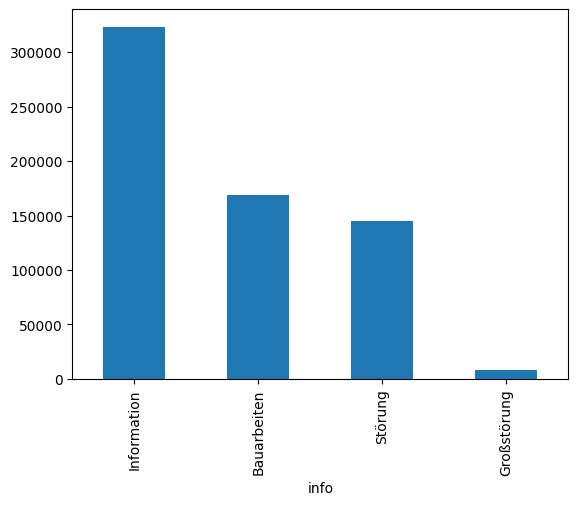

In [9]:
date_replacements = {
    'Bauarbeiten. (Quelle: zuginfo.nrw)': 'Bauarbeiten',
    'Störung. (Quelle: zuginfo.nrw)' : 'Störung',
    'Information. (Quelle: zuginfo.nrw)' : 'Information',
}
df['info'] = df['info'].replace(date_replacements)

df["info"].value_counts().plot.bar()

grouping by station names and creating features for the count of occurences of the distinct Information categories.

In [10]:
df_info = df.groupby(("station")).mean(numeric_only=True).copy()
df_info["disturbance"] = df[df["info"] == "Störung"][["station","departure_plan"]].groupby(("station")).count()
df_info["information"] = df[df["info"] == "Information"][["station","departure_plan"]].groupby(("station")).count()
df_info["construction"] = df[df["info"] == "Bauarbeiten"][["station","departure_plan"]].groupby(("station")).count()
df_info["area_disturbance"] = df[df["info"] == "Großstörung"][["station","departure_plan"]].groupby(("station")).count()

In [11]:
df_info.head()

,category,long,lat,arrival_delay_m,departure_delay_m,attention: datapoints 240711_04 - 240711_06 are simulated because of measurement issues,disturbance,information,construction,area_disturbance
station,,,,,,,,,,
Aachen Hbf,2.0,6.091499,50.767800,0.235215,0.428763,NaN,112.0,100.0,11.0,NaN
Aachen Schanz,5.0,6.073840,50.769862,1.038747,1.173949,NaN,160.0,NaN,4.0,NaN
Aachen West,5.0,6.070715,50.780360,0.768349,0.943807,NaN,203.0,NaN,4.0,NaN
Aachen-Rothe Erde,4.0,6.116475,50.770202,1.249737,1.243414,NaN,66.0,127.0,8.0,NaN
Aalen Hbf,3.0,10.096271,48.841013,0.321993,0.420413,NaN,1.0,288.0,NaN,NaN


In [12]:

fig = px.density_mapbox(
    df_info,
    lat='lat',
    lon='long',
    z='disturbance',
    hover_name=df_info.index,
    radius=10,
    range_color=[0, df_info.disturbance.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="disturbance heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.show()


In [13]:

fig = px.density_mapbox(
    df_info,
    lat='lat',
    lon='long',
    z='construction',
    hover_name=df_info.index,
    radius=10,
    range_color=[0, df_info.construction.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="construction heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.show()


In [14]:
fig = px.density_mapbox(
    df_info,
    lat='lat',
    lon='long',
    z='area_disturbance',
    hover_name=df_info.index,
    radius=10,
    range_color=[0, df_info.area_disturbance.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="area_disturbance heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.show()


# Geographical analysis

In [15]:
heatmap_df = df.groupby("station", as_index=False ).mean(numeric_only=True)

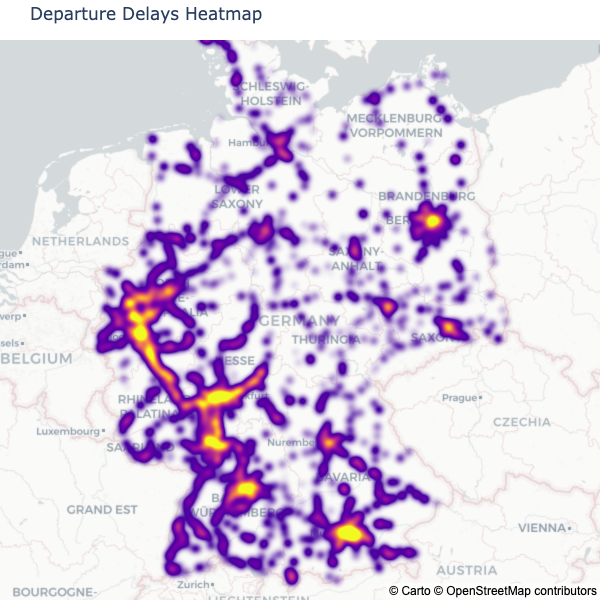

In [16]:

fig = px.density_mapbox(
    heatmap_df,
    lat='lat',
    lon='long',
    z='departure_delay_m',
    hover_name="station",
    radius=10,
    range_color=[0, heatmap_df.departure_delay_m.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="Departure Delays Heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.write_image("images/heatmap.png", scale=1)
display.Image("images/heatmap.png")


# Creating Features for further analysis

In [17]:
df_state_count_delay2 = df[df["departure_delay_check"] == "delay"].groupby("state", as_index=False).count()
df_state_count = df.groupby("state", as_index=False).count()
df_state_sum = df[df["departure_delay_check"] == "delay"].groupby("state", as_index=False).sum("departure_delay_m")

## Merging Dataframes

In [18]:
#merging
df_state = pd.merge(df_state_sum, df_state_count[["state","departure_plan"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay2[["state","departure_delay_check"]], how='left', on="state", suffixes=('', '_count'))

In [19]:
df_state = df_state[[
    'state', 
    #'eva_nr', 'category', 'zip', 'long', 'lat', 
    'departure_delay_m', 'departure_plan',
    'departure_delay_check',
    ]]
df_state.head()

,state,departure_delay_m,departure_plan,departure_delay_check
0,Baden-Württemberg,224272.0,253224,18177
1,Bayern,253951.0,330381,23011
2,Berlin,53524.0,334845,4936
3,Brandenburg,37296.0,58961,2779
4,Bremen,2413.0,10428,137


## Calculating new Columns

In [20]:
df_state["delay_m/departure"] = (df_state["departure_delay_m"] / df_state["departure_plan"])
df_state["delay_m/delay_cnt"] = (df_state["departure_delay_m"] / df_state["departure_delay_check"])
df_state["delay_cnt/departure"] = (df_state["departure_delay_check"] / df_state["departure_plan"]) *100


In [21]:
df_state.head()

,state,departure_delay_m,departure_plan,departure_delay_check,delay_m/departure,delay_m/delay_cnt,delay_cnt/departure
0,Baden-Württemberg,224272.0,253224,18177,0.885666,12.338230,7.178230
1,Bayern,253951.0,330381,23011,0.768661,11.036070,6.964989
2,Berlin,53524.0,334845,4936,0.159847,10.843598,1.474115
3,Brandenburg,37296.0,58961,2779,0.632554,13.420655,4.713285
4,Bremen,2413.0,10428,137,0.231396,17.613139,1.313771


In [22]:
df_state.describe()

,departure_delay_m,departure_plan,departure_delay_check,delay_m/departure,delay_m/delay_cnt,delay_cnt/departure
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,83503.250000,128834.812500,6959.250000,0.582832,12.449227,4.726576
std,102836.844826,123555.896311,8609.066256,0.291547,1.734119,2.427310
min,2413.000000,10428.000000,137.000000,0.139481,9.325712,1.313771
25%,14344.000000,29107.000000,1212.250000,0.426964,11.757875,3.517468
50%,38694.500000,80854.000000,2952.000000,0.547578,12.330550,4.292070
75%,107445.250000,213537.000000,8863.000000,0.762408,12.907112,6.398700
max,335991.000000,342957.000000,27212.000000,1.171685,17.613139,9.717384


# Side by Side comparison

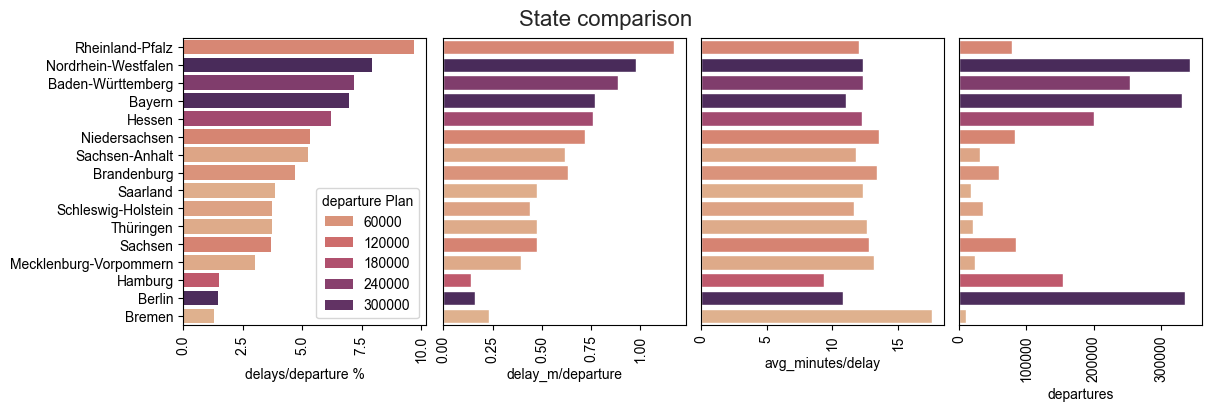

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="delay_cnt/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[0])
axes[0].set_xlabel(f"delays/departure %")
axes[0].set_ylabel("")
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title="departure Plan")

sns.set_theme(style="whitegrid")
sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="delay_m/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[1])
axes[1].set_xlabel(f"delay_m/departure")
axes[1].set_ylabel("states")
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title="departure Plan")
axes[1].get_legend().remove()
axes[1].get_yaxis().set_visible(False)

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="delay_m/delay_cnt", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[2])
axes[2].set_xlabel(f"avg_minutes/delay")
axes[2].set_ylabel("states")
axes[2].tick_params(axis='x', rotation=90)
axes[2].legend(title="departure Plan")
axes[2].get_legend().remove()
axes[2].get_yaxis().set_visible(False)

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="departure_plan", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[3])
axes[3].set_xlabel(f"departures")
axes[3].set_ylabel("states")
axes[3].tick_params(axis='x', rotation=90)
axes[3].legend(title="departure Plan")
axes[3].get_legend().remove()
axes[3].get_yaxis().set_visible(False)



fig.suptitle("State comparison", fontsize=16)
plt.show()

NRW; BW, Bayern and Hessen have the highest ratio of delay% to departure events and are therefore the prime suspects for in depth analysis.
<br>While Rheinland-Pfalz and Niedersachsen also have a high ratio, they are contributing much less to the total amount of arrival events and therefore not as important to prioritize.

# Per State

In [24]:
station_top = {} #initiate dictionary

In [25]:
country_mean = df_state["delay_cnt/departure"].mean()

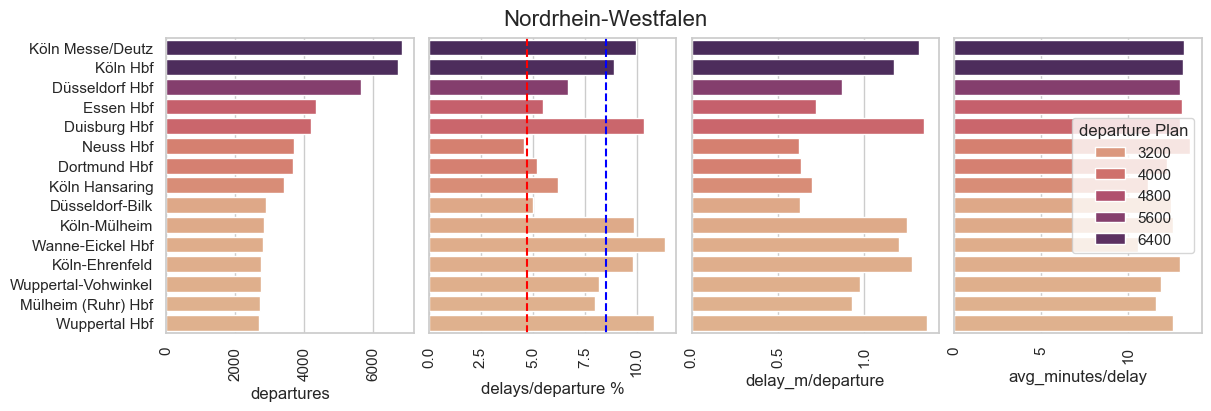

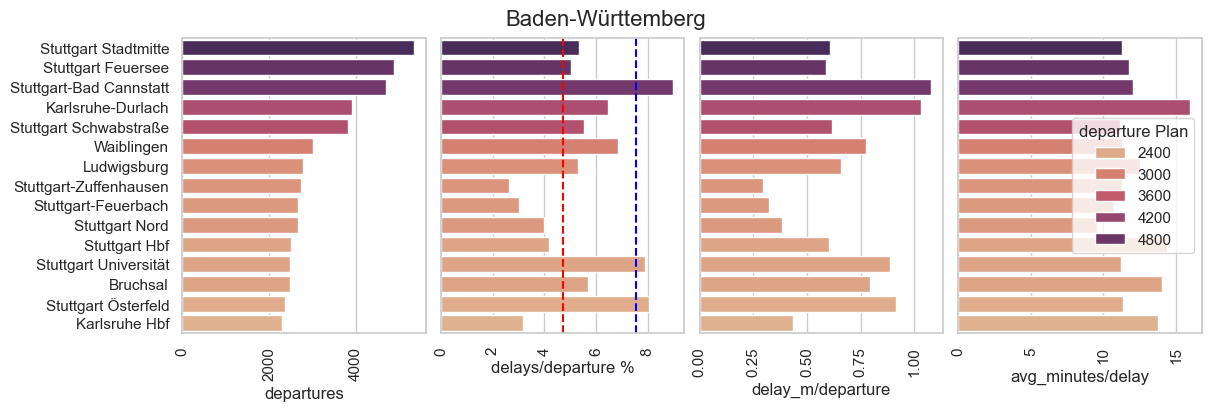

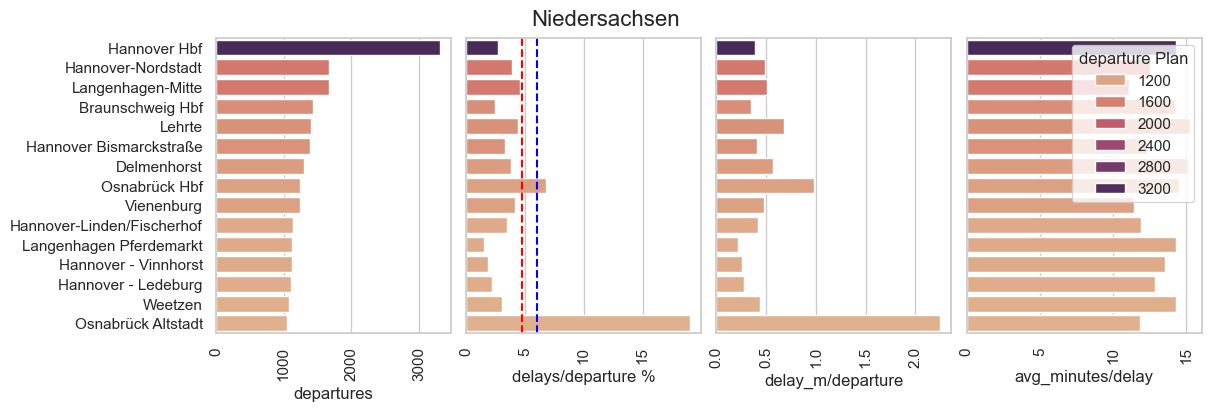

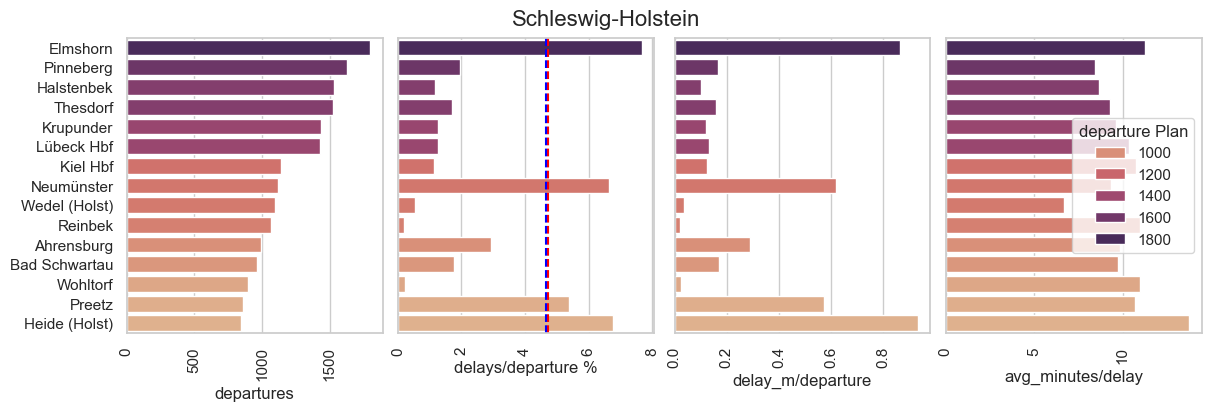

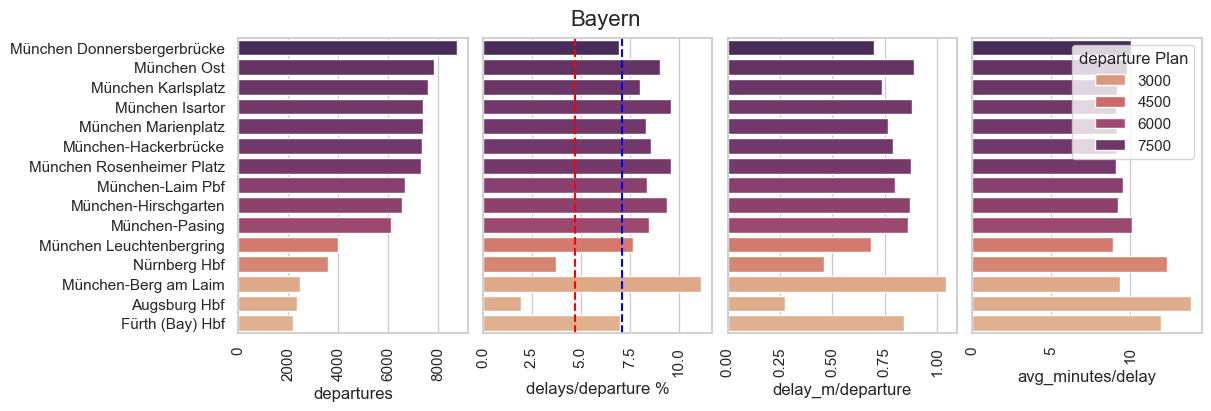

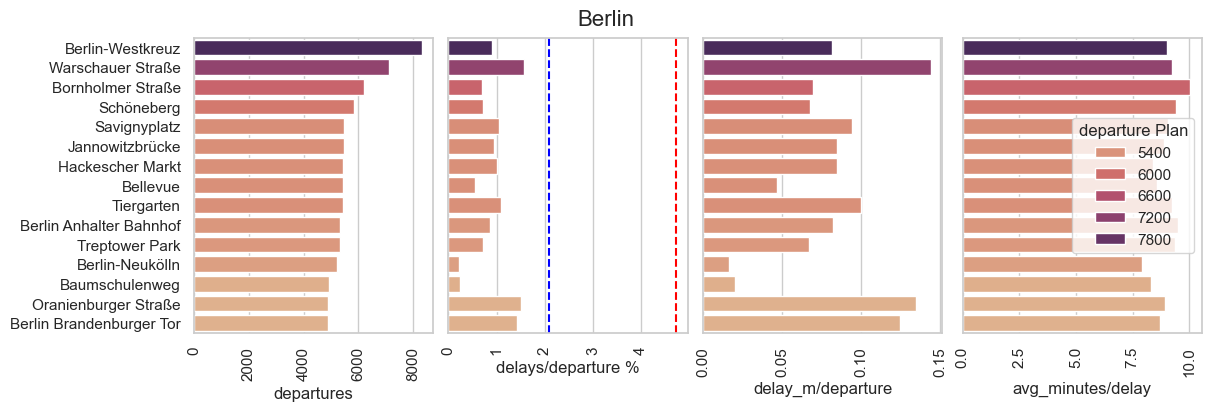

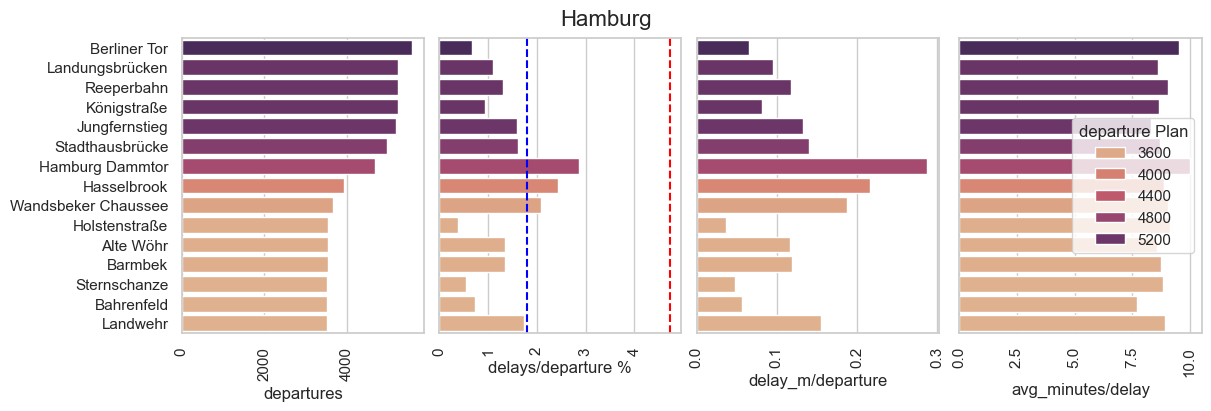

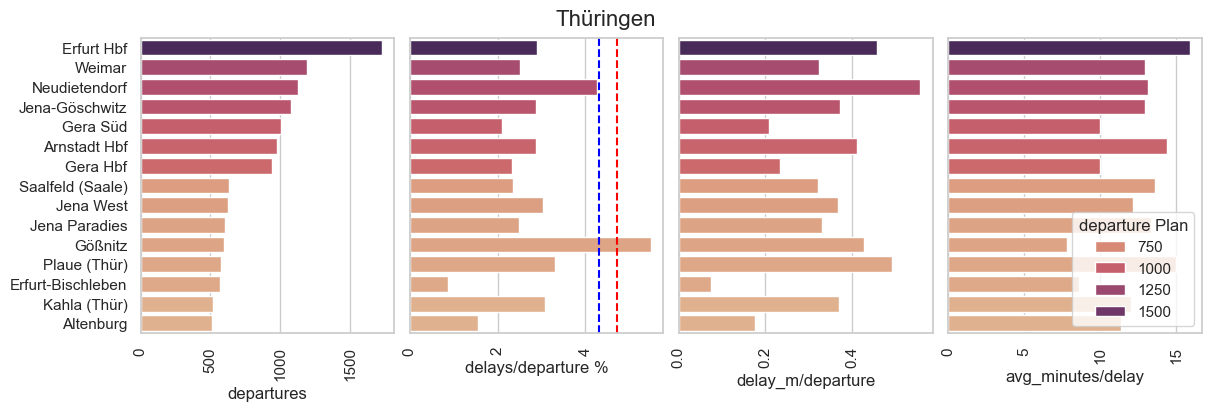

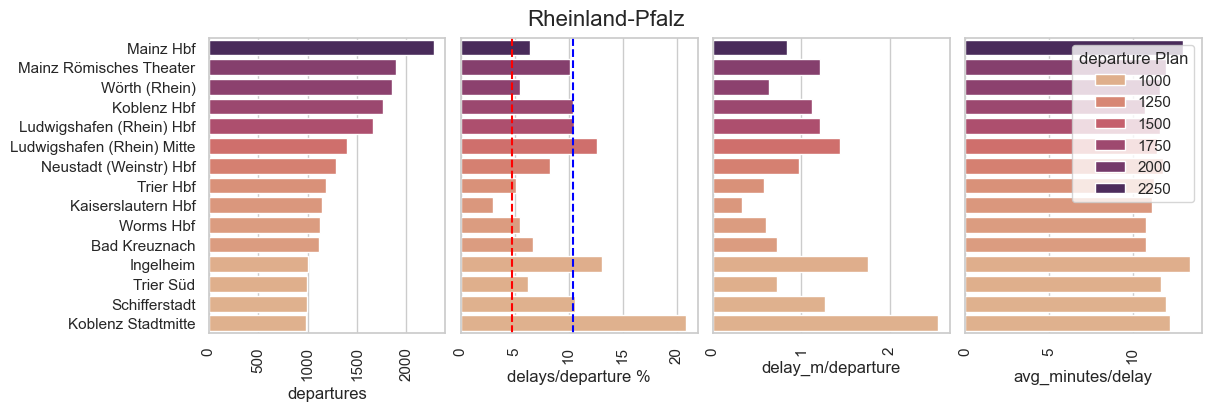

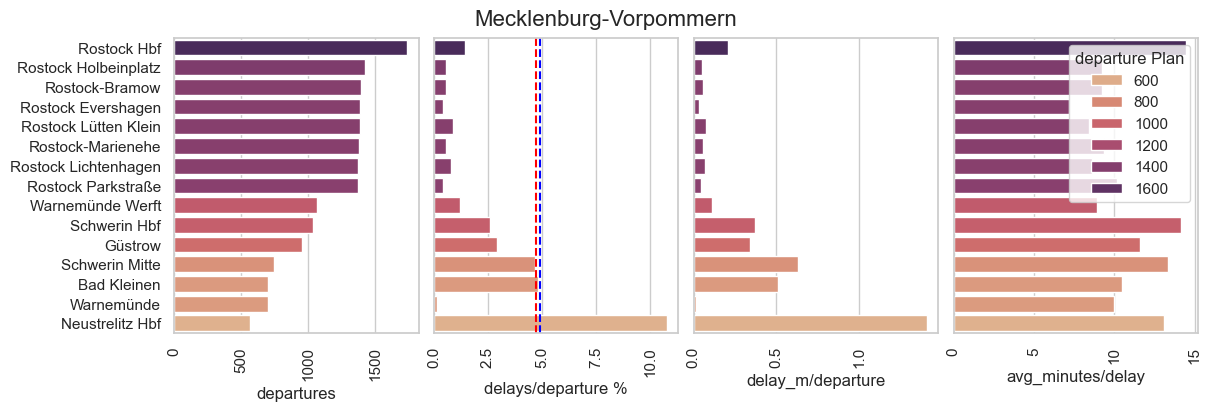

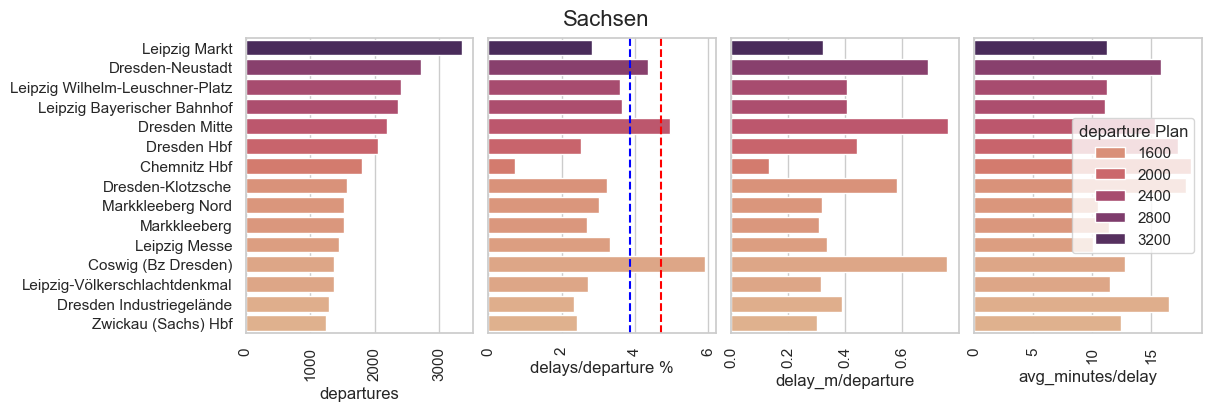

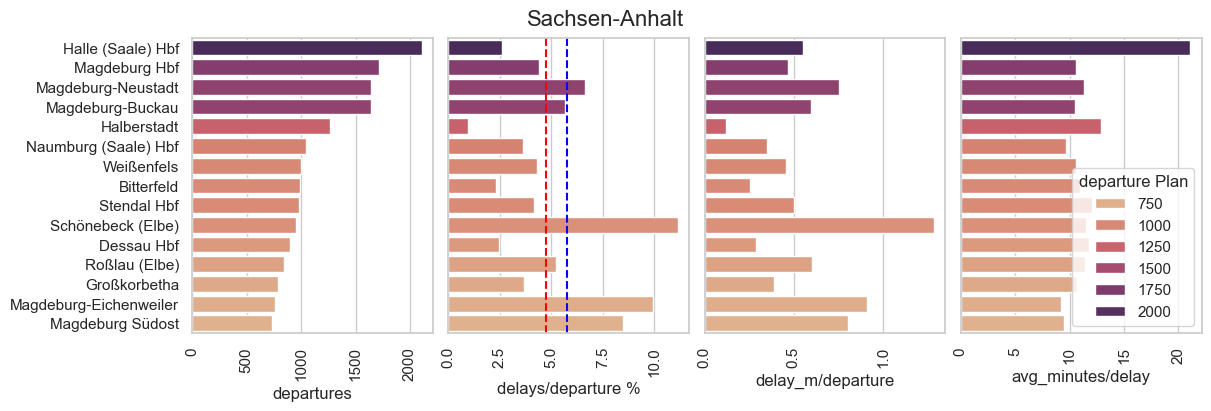

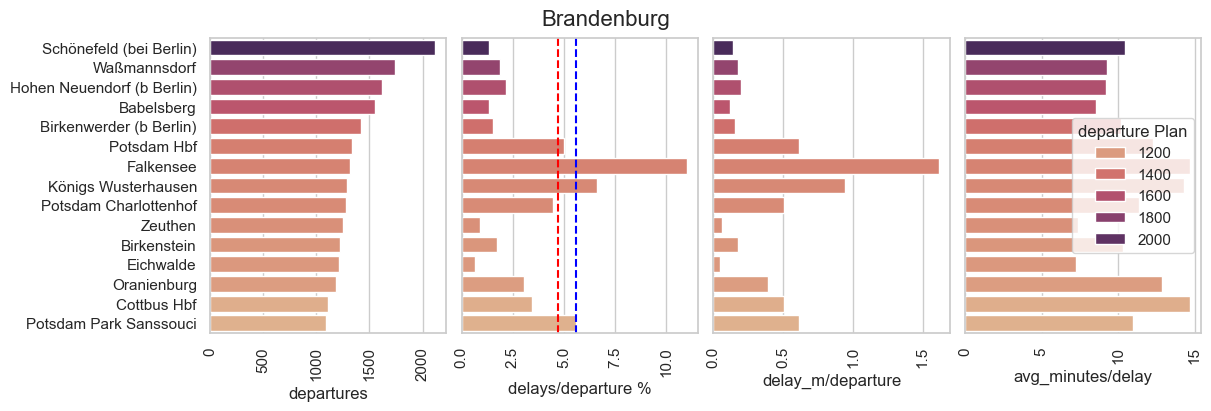

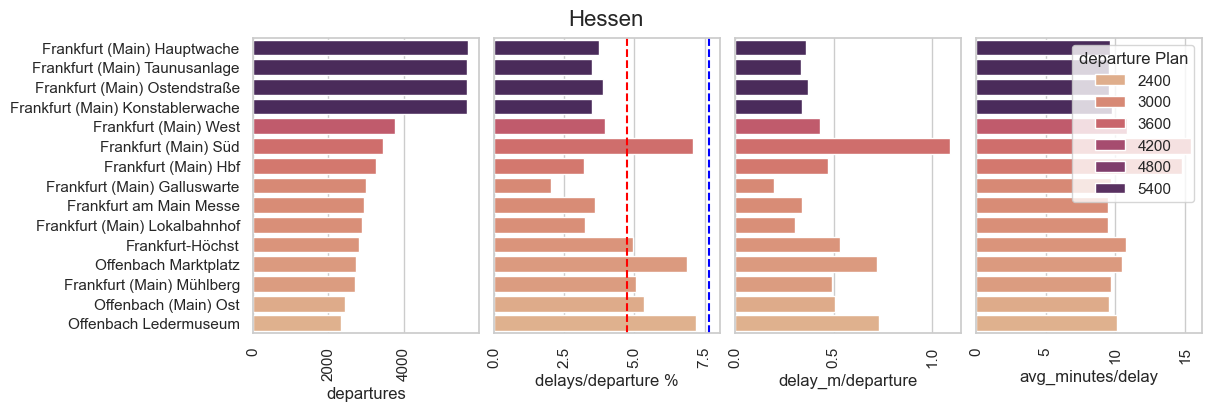

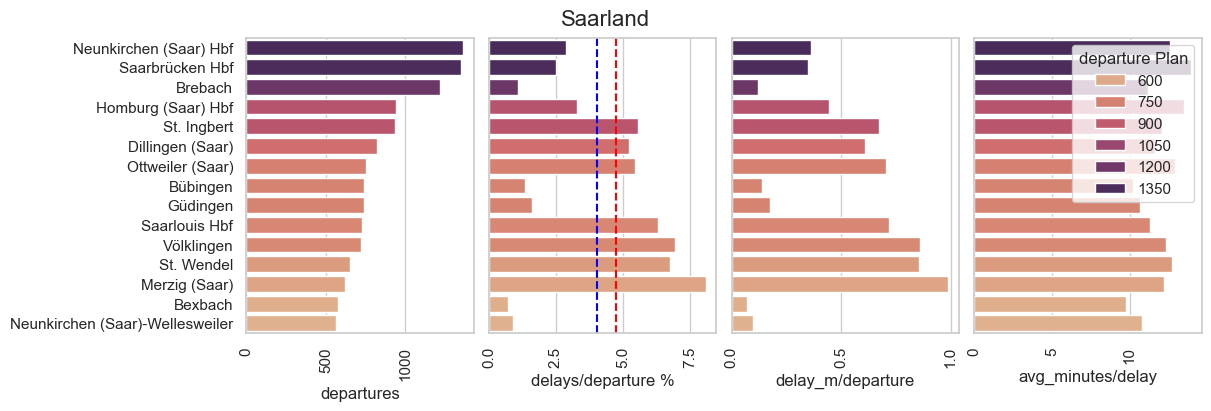

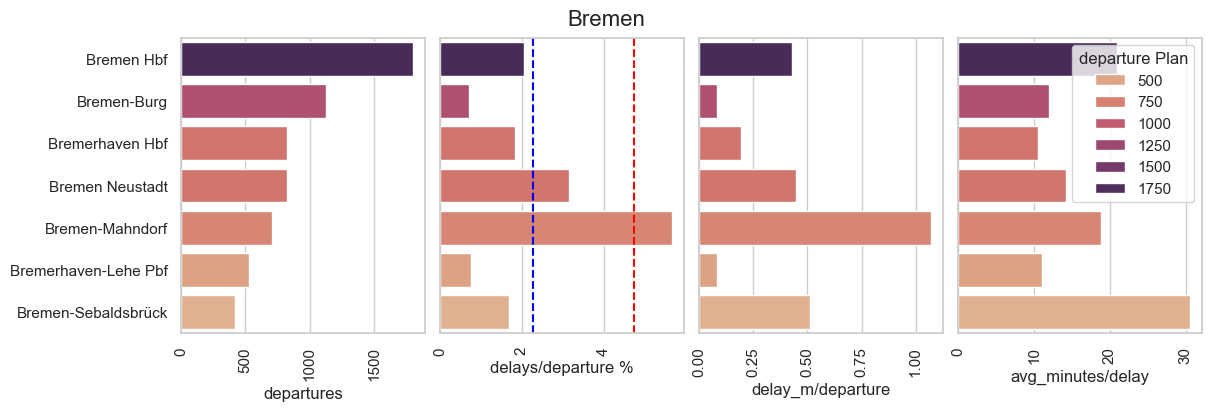

In [26]:

for state in statelist:
    df_station = frames[state].copy()
    df_station_sum = df_station[df_station["departure_delay_check"] == "delay"].groupby(["station"], as_index=False).sum("departure_delay_m")
    df_station_count = df_station.groupby(["station"], as_index=False).count()
    df_station_count_delay = df_station[df_station["departure_delay_check"] == "delay"].groupby(["station"], as_index=False).count()

    df_station = pd.merge(df_station_sum, df_station_count[["station","departure_plan"]], how='left', on="station", suffixes=('', '_count'))
    df_station = pd.merge(df_station, df_station_count_delay[["station","departure_delay_check"]], how='left', on="station", suffixes=('', '_count'))
    
    df_station["delay_m/departure"] = (df_station["departure_delay_m"] / df_station["departure_plan"])
    df_station["delay_m/delay_cnt"] = (df_station["departure_delay_m"] / df_station["departure_delay_check"])
    df_station["delay_cnt/departure"] = (df_station["departure_delay_check"] / df_station["departure_plan"]) *100
 
    fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

    state_mean = df_station["delay_cnt/departure"].mean()

    station_top[state] = df_station.sort_values(by="departure_plan", ascending=False).head(15)
    station_top[state] = station_top[state].sort_values(by="delay_cnt/departure", ascending=False).station.head().values
    #collecting the names of the 5 stations with the most departure from the top 15 delays/departure in a dictionary per state

    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="station", x="departure_plan", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[0])
    axes[0].set_xlabel(f"departures")
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].set_ylabel("")
    axes[0].get_legend().remove()


    

    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="station", x="delay_cnt/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[1])
    axes[1].set_xlabel(f"delays/departure %")
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].get_legend().remove()
    axes[1].get_yaxis().set_visible(False)
    axes[1].axvline(x=country_mean, color='red', linestyle='--')
    axes[1].axvline(x=state_mean, color='blue', linestyle='--')

    sns.set_theme(style="whitegrid")
    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="station", x="delay_m/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[2])
    axes[2].set_xlabel(f"delay_m/departure")
    axes[2].tick_params(axis='x', rotation=90)
    axes[2].get_legend().remove()
    axes[2].get_yaxis().set_visible(False)

    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="station", x="delay_m/delay_cnt", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[3])
    axes[3].set_xlabel(f"avg_minutes/delay")
    axes[3].tick_params(axis='x', rotation=90)
    #axes[3].get_legend().remove()
    axes[3].get_yaxis().set_visible(False)
    axes[3].legend(title="departure Plan")




    fig.suptitle(state, fontsize=16)
    plt.show()


In [27]:
station_top

{'Nordrhein-Westfalen': array(['Wanne-Eickel Hbf', 'Wuppertal Hbf', 'Duisburg Hbf',
        'Köln Messe/Deutz', 'Köln-Mülheim'], dtype=object),
 'Baden-Württemberg': array(['Stuttgart-Bad Cannstatt', 'Stuttgart Österfeld',
        'Stuttgart Universität', 'Waiblingen', 'Karlsruhe-Durlach'],
       dtype=object),
 'Niedersachsen': array(['Osnabrück Altstadt', 'Osnabrück Hbf', 'Langenhagen-Mitte',
        'Lehrte', 'Vienenburg'], dtype=object),
 'Schleswig-Holstein': array(['Elmshorn', 'Heide (Holst)', 'Neumünster', 'Preetz', 'Ahrensburg'],
       dtype=object),
 'Bayern': array(['München-Berg am Laim', 'München Rosenheimer Platz',
        'München Isartor', 'München-Hirschgarten', 'München Ost'],
       dtype=object),
 'Berlin': array(['Warschauer Straße', 'Oranienburger Straße',
        'Berlin Brandenburger Tor', 'Tiergarten', 'Savignyplatz'],
       dtype=object),
 'Hamburg': array(['Hamburg Dammtor', 'Hasselbrook', 'Wandsbeker Chaussee',
        'Landwehr', 'Stadthausbrücke'], dtype

# per Line

In [28]:
line_top = {}

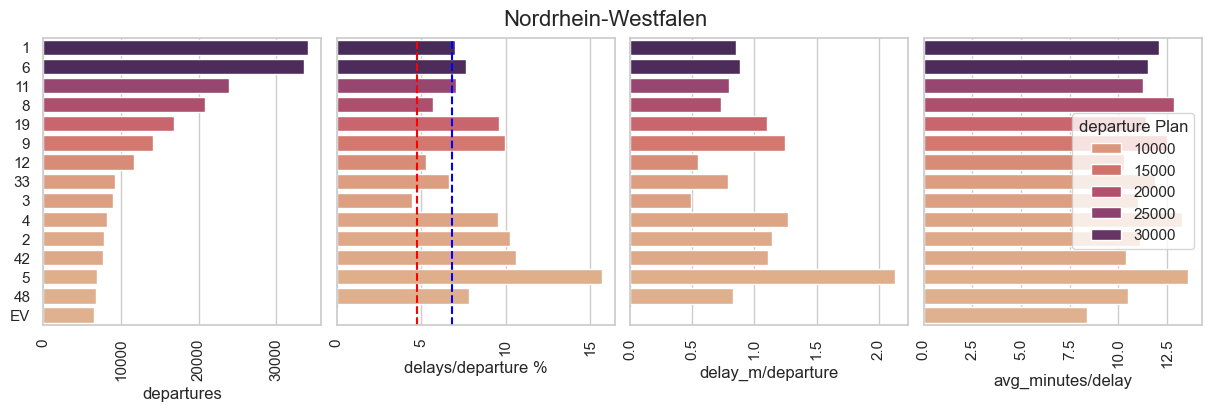

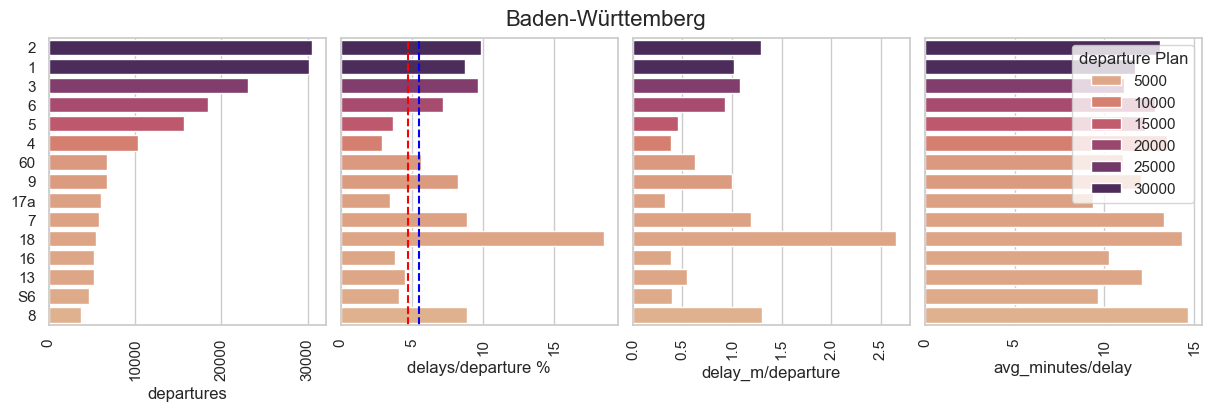

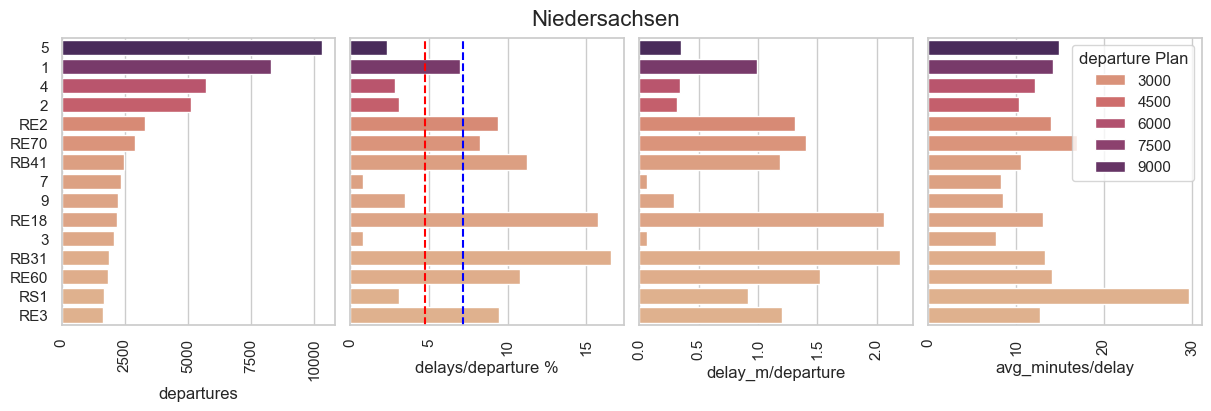

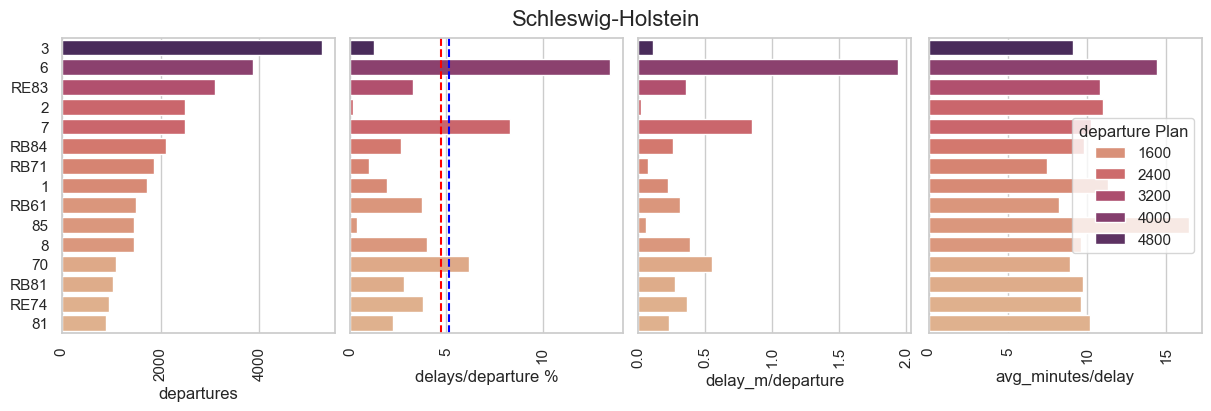

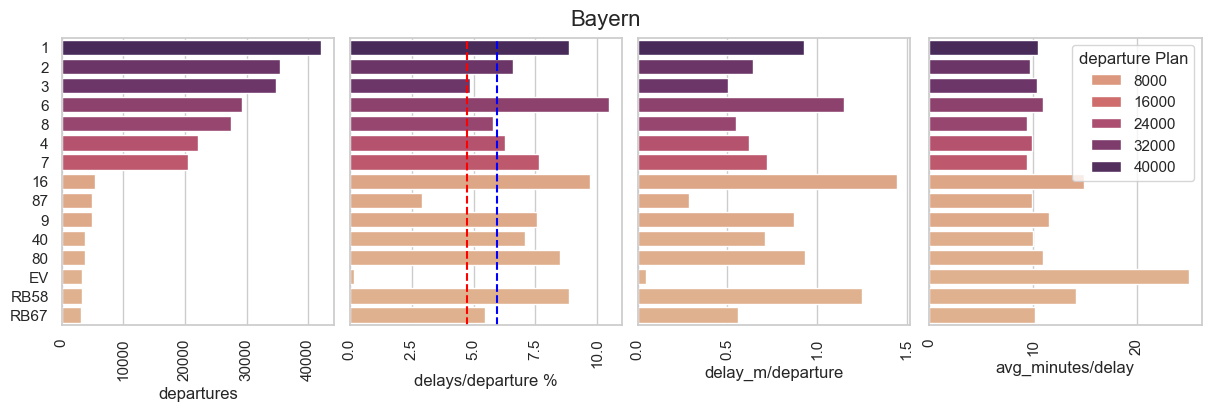

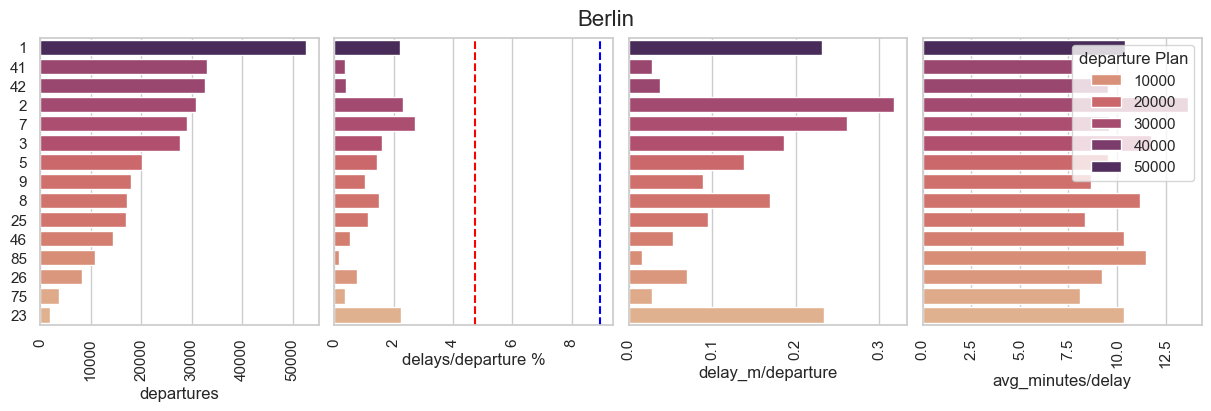

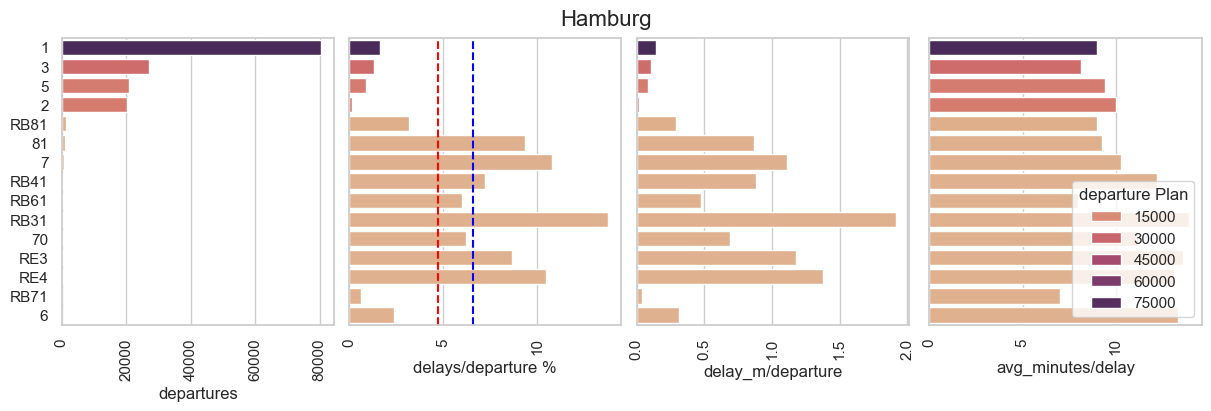

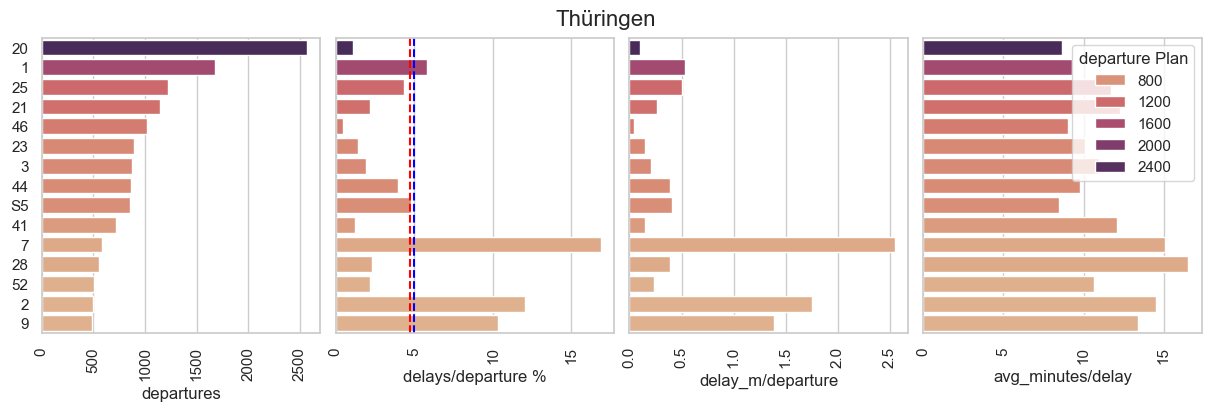

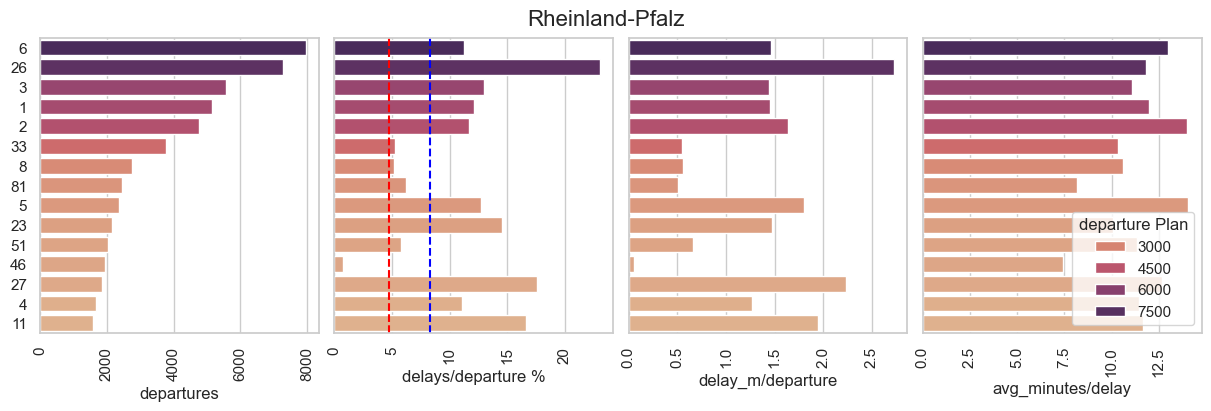

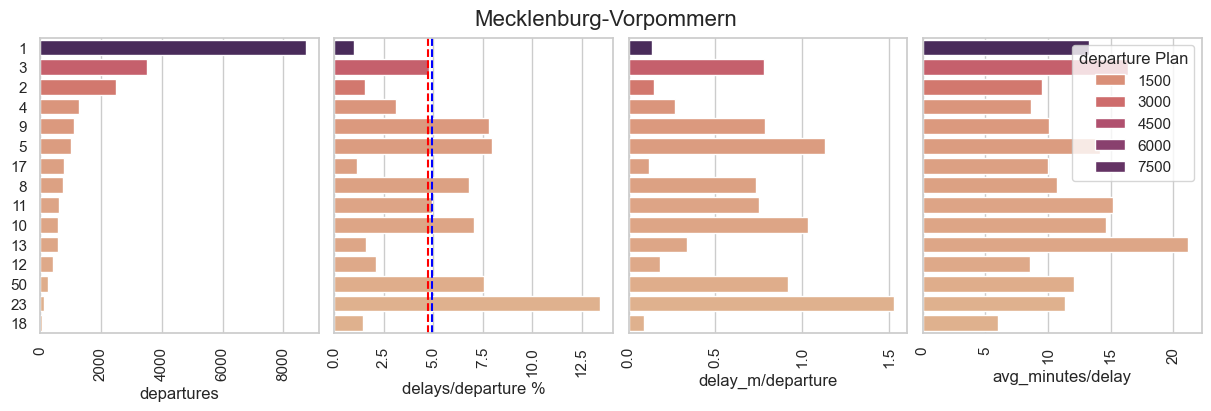

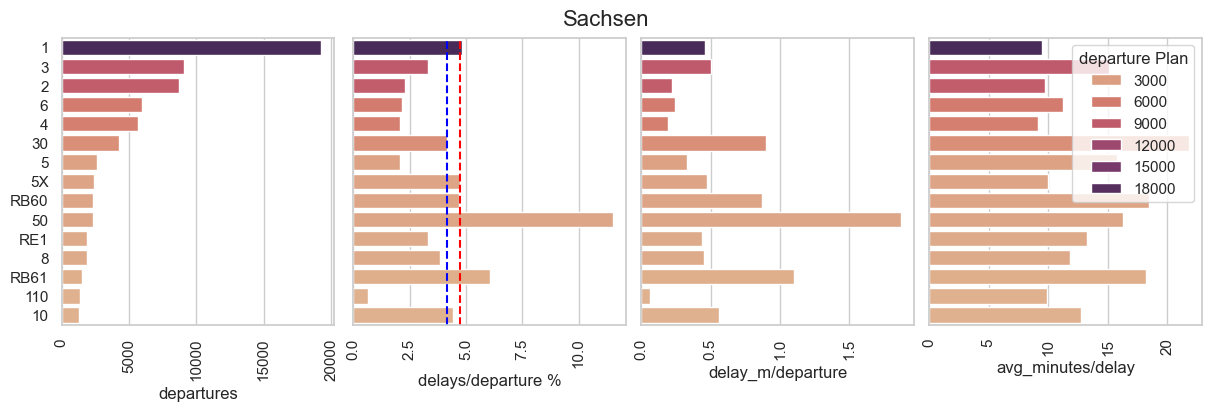

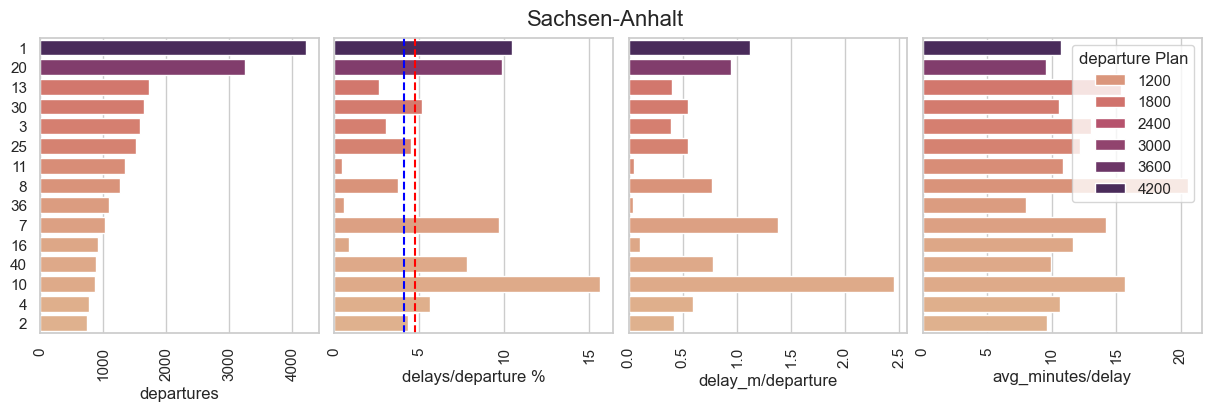

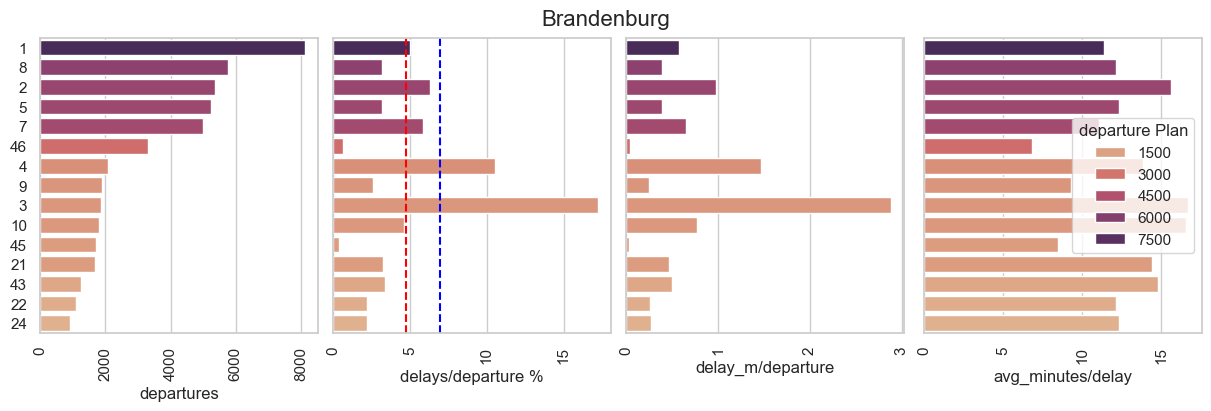

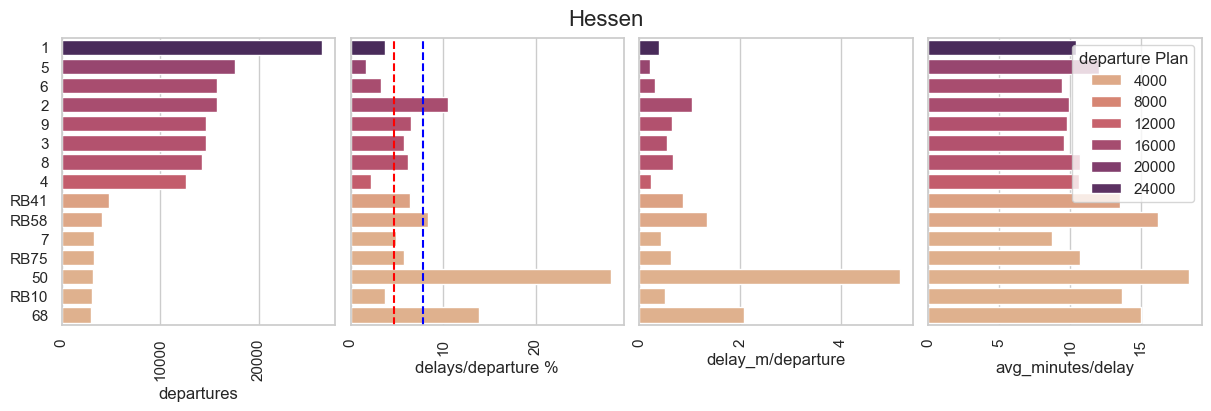

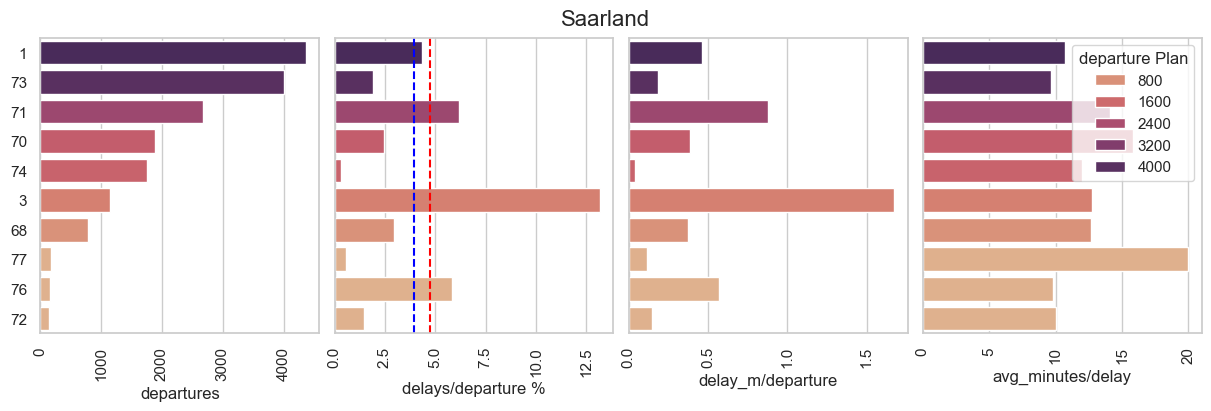

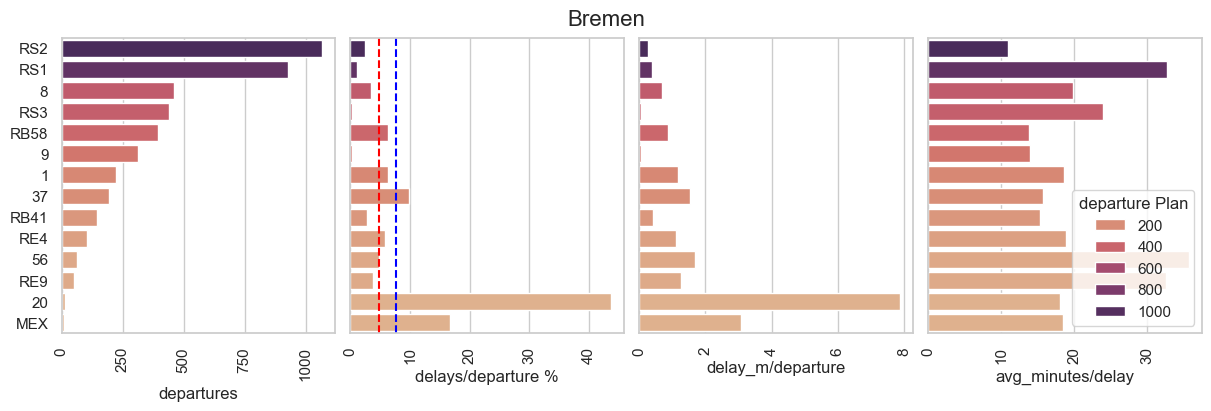

In [29]:
for state in statelist:
    df_line = frames[state].copy()
    df_line_sum = df_line[df_line["departure_delay_check"] == "delay"].groupby(["line"], as_index=False).sum("departure_delay_m")
    df_line_count = df_line.groupby(["line"], as_index=False).count()
    df_line_count_delay = df_line[df_line["departure_delay_check"] == "delay"].groupby(["line"], as_index=False).count()

    df_line = pd.merge(df_line_sum, df_line_count[["line","departure_plan"]], how='left', on="line", suffixes=('', '_count'))
    df_line = pd.merge(df_line, df_line_count_delay[["line","departure_delay_check"]], how='left', on="line", suffixes=('', '_count'))
    
    df_line["delay_m/departure"] = (df_line["departure_delay_m"] / df_line["departure_plan"])
    df_line["delay_m/delay_cnt"] = (df_line["departure_delay_m"] / df_line["departure_delay_check"])
    df_line["delay_cnt/departure"] = (df_line["departure_delay_check"] / df_line["departure_plan"]) *100
    
    state_mean = df_line["delay_cnt/departure"].mean()
 
    fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

    line_top[state] = df_line.sort_values(by="departure_plan", ascending=False).head(15)
    line_top[state] = line_top[state].sort_values(by="delay_cnt/departure", ascending=False).line.head().values
    #adding the names of the lines from the top 15 delay/departures filtered by the top 5 number of departures into the dictionary

    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="departure_plan", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[0])
    axes[0].set_xlabel(f"departures")
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].set_ylabel("")
    axes[0].get_legend().remove()

    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="delay_cnt/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[1])
    axes[1].set_xlabel(f"delays/departure %")
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].get_legend().remove()
    axes[1].get_yaxis().set_visible(False)
    axes[1].axvline(x=country_mean, color='red', linestyle='--')
    axes[1].axvline(x=state_mean, color='blue', linestyle='--')

    sns.set_theme(style="whitegrid")
    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="delay_m/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[2])
    axes[2].set_xlabel(f"delay_m/departure")
    axes[2].tick_params(axis='x', rotation=90)
    axes[2].get_legend().remove()
    axes[2].get_yaxis().set_visible(False)

    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="delay_m/delay_cnt", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[3])
    axes[3].set_xlabel(f"avg_minutes/delay")
    axes[3].tick_params(axis='x', rotation=90)
    axes[3].legend(title="departure Plan")
    axes[3].get_yaxis().set_visible(False)




    fig.suptitle(state, fontsize=16)
    plt.show()


In [30]:
line_top

{'Nordrhein-Westfalen': array(['5', '42', '2', '9', '19'], dtype=object),
 'Baden-Württemberg': array(['18', '2', '3', '7', '8'], dtype=object),
 'Niedersachsen': array(['RB31', 'RE18', 'RB41', 'RE60', 'RE3'], dtype=object),
 'Schleswig-Holstein': array(['6', '7', '70', '8', 'RE74'], dtype=object),
 'Bayern': array(['6', '16', '1', 'RB58', '80'], dtype=object),
 'Berlin': array(['7', '2', '23', '1', '3'], dtype=object),
 'Hamburg': array(['RB31', '7', 'RE4', '81', 'RE3'], dtype=object),
 'Thüringen': array(['7', '2', '9', '1', 'S5'], dtype=object),
 'Rheinland-Pfalz': array(['26', '27', '11', '23', '3'], dtype=object),
 'Mecklenburg-Vorpommern': array(['23', '5', '9', '50', '10'], dtype=object),
 'Sachsen': array(['50', 'RB61', '1', '5X', 'RB60'], dtype=object),
 'Sachsen-Anhalt': array(['10', '1', '20', '7', '40'], dtype=object),
 'Brandenburg': array(['3', '4', '2', '7', '1'], dtype=object),
 'Hessen': array(['50', '68', '2', 'RB58', '9'], dtype=object),
 'Saarland': array(['3', '71'

In [31]:
statelist_filtered = ['Nordrhein-Westfalen', 'Baden-Württemberg', 'Bayern', 'Hessen']
line_geo_state = {}
line_geo_list = []

In [32]:
stations_line = []

getting the stations that are passed by the problematic lines

In [33]:
for state in statelist_filtered:
    line_geo = {}
    for line in line_top[state]:
        temp_df = df[(df["state"] == state)&(df['line'] == line)].groupby("station", as_index=False).mean(numeric_only=True)
        stations_line.append(temp_df["station"].values)
        temp_df2 = df[(df["state"] == state)&(df['line'] == line)&(df["departure_delay_check"] == "delay")].groupby("station", as_index=False).count()
        temp_df3 = pd.merge(temp_df, temp_df2[["station","departure_delay_check"]], how='left', on="station", suffixes=('', '_count'))
        temp_df3.fillna(value=0, inplace=True)
        line_geo[f"{line}"] = temp_df3.copy()

    line_geo_state[state] = line_geo





In [34]:
combined_list = []
for item in stations_line:
    combined_list = combined_list + item.tolist()
stations_line = combined_list

In [35]:
combined_list = []
for key in station_top:
    combined_list = combined_list + station_top[key].tolist()
station_top = combined_list

In [36]:
mapbox_state = {
    'Bayern' : [48.7904, 11.4979], 
    'Nordrhein-Westfalen' : [51.4332, 7.6616], 
    'Hessen' : [50.6521, 9.1624], 
    'Baden-Württemberg' : [48.6616, 9.3501]

}


In [37]:
print('<table width="100%" border="1">')

for state in statelist_filtered:
    print("<tr>")
    for key in line_geo_state[state].keys():
        fig = px.density_mapbox(
            line_geo_state[state][key],
            lat='lat',
            lon='long',
            z='departure_delay_check',
            hover_name="station",
            radius=10,
            range_color=[0, line_geo_state[state][key].departure_delay_check.max()],
            mapbox_style="carto-positron",
            center={"lat": mapbox_state[state][0], "lon": mapbox_state[state][1]},
            zoom=7,
            width=600,
            height=600,
            title=f"Delay Heatmap for line {key} in {state}"
        )

        fig.update_layout(
            margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
            coloraxis_showscale=False
            )
        

        fig.write_image(f"images/{state}-{key}.png", scale=1)
        print(f'<td><img src="images/{state}-{key}.png"></td>')
    print("</tr>")
print("</table>")
        

<table width="100%" border="1">
<tr>


<td><img src="images/Nordrhein-Westfalen-5.png"></td>
<td><img src="images/Nordrhein-Westfalen-42.png"></td>
<td><img src="images/Nordrhein-Westfalen-2.png"></td>
<td><img src="images/Nordrhein-Westfalen-9.png"></td>
<td><img src="images/Nordrhein-Westfalen-19.png"></td>
</tr>
<tr>
<td><img src="images/Baden-Württemberg-18.png"></td>
<td><img src="images/Baden-Württemberg-2.png"></td>
<td><img src="images/Baden-Württemberg-3.png"></td>
<td><img src="images/Baden-Württemberg-7.png"></td>
<td><img src="images/Baden-Württemberg-8.png"></td>
</tr>
<tr>
<td><img src="images/Bayern-6.png"></td>
<td><img src="images/Bayern-16.png"></td>
<td><img src="images/Bayern-1.png"></td>
<td><img src="images/Bayern-RB58.png"></td>
<td><img src="images/Bayern-80.png"></td>
</tr>
<tr>
<td><img src="images/Hessen-50.png"></td>
<td><img src="images/Hessen-68.png"></td>
<td><img src="images/Hessen-2.png"></td>
<td><img src="images/Hessen-RB58.png"></td>
<td><img src="images/Hessen-9.png"></td>
</tr>
</table>

<table width="100%" border="1">
<tr>
<td><img src="images/Nordrhein-Westfalen-5.png"></td>
<td><img src="images/Nordrhein-Westfalen-S7.png"></td>
<td><img src="images/Nordrhein-Westfalen-42.png"></td>
<td><img src="images/Nordrhein-Westfalen-2.png"></td>
<td><img src="images/Nordrhein-Westfalen-4.png"></td>
</tr>
<tr>
<td><img src="images/Baden-Württemberg-18.png"></td>
<td><img src="images/Baden-Württemberg-12.png"></td>
<td><img src="images/Baden-Württemberg-3.png"></td>
<td><img src="images/Baden-Württemberg-2.png"></td>
<td><img src="images/Baden-Württemberg-1.png"></td>
</tr>
<tr>
<td><img src="images/Bayern-6.png"></td>
<td><img src="images/Bayern-1.png"></td>
<td><img src="images/Bayern-7.png"></td>
<td><img src="images/Bayern-RB58.png"></td>
<td><img src="images/Bayern-16.png"></td>
</tr>
<tr>
<td><img src="images/Hessen-50.png"></td>
<td><img src="images/Hessen-2.png"></td>
...
<td><img src="images/Hessen-RB41.png"></td>
<td><img src="images/Hessen-9.png"></td>
</tr>
</table>


In [38]:
df.head()

,line,path,category,station,state,city,long,lat,arrival_plan,departure_plan,...,arrival_delay_m,departure_delay_m,info,attention: datapoints 240711_04 - 240711_06 are simulated because of measurement issues,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date
0,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,2.0,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,2024-07-08 00:00:00,2024-07-08 00:01:00,...,3.0,3.0,NaN,NaN,on_time,on_time,00:00:00,2024-07-08,00:01:00,2024-07-08
1,18,NaN,2.0,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,NaT,2024-07-08 00:17:00,...,0.0,0.0,NaN,NaN,on_time,on_time,NaT,NaT,00:17:00,2024-07-08
2,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,4.0,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,6.116475,50.770202,2024-07-08 00:03:00,2024-07-08 00:04:00,...,0.0,0.0,NaN,NaN,on_time,on_time,00:03:00,2024-07-08,00:04:00,2024-07-08
3,18,Aachen Hbf,5.0,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,...,0.0,0.0,NaN,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08
4,33,Herzogenrath|Kohlscheid,5.0,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,...,0.0,0.0,NaN,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08


In [39]:
df['path'] = df['path'].fillna("Start")

In [40]:
def get_last_station(stations):
    return stations.split('|')[-1]

df['path'] = df['path'].apply(get_last_station)

In [41]:
df_path = df.groupby("path", as_index=False).count().copy()
df_path = pd.merge(df_path, df[df["arrival_delay_check"] == "delay"][["path","arrival_plan","departure_plan"]].groupby("path", as_index=False).count(), how='left', on="path", suffixes=('', '_count'))
df_path["delays/arrival"] = (df_path["arrival_plan_count"] / df_path["arrival_plan"]) * 100
df_path["delays/departure"] = (df_path["departure_plan_count"] / df_path["departure_plan"]) * 100



In [42]:
df_path.head()

,path,line,category,station,state,city,long,lat,arrival_plan,departure_plan,...,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date,arrival_plan_count,departure_plan_count,delays/arrival,delays/departure
0,Aachen Hbf,1389,1389,1389,1389,1389,1389,1389,1389,1389,...,1389,1389,1389,1389,1389,1389,28.0,28.0,2.015839,2.015839
1,Aachen Schanz,902,902,902,902,902,902,902,902,902,...,902,902,902,902,902,902,14.0,14.0,1.552106,1.552106
2,Aachen West,1512,1512,1512,1512,1512,1512,1512,1512,1512,...,1512,1512,1512,1512,1512,1512,64.0,64.0,4.232804,4.232804
3,Aachen-Rothe Erde,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,18.0,18.0,3.813559,3.813559
4,Aalen Hbf,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,6.0,6.0,4.918033,4.918033


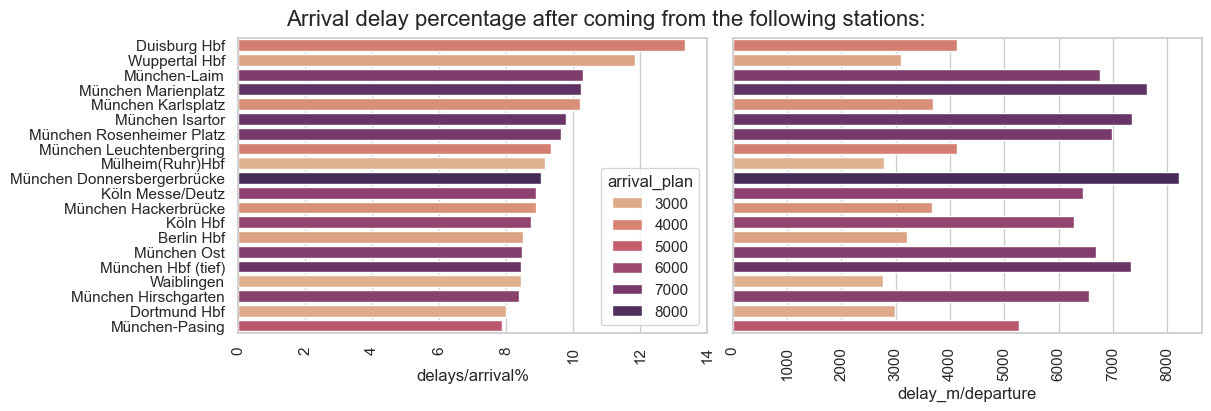

In [43]:
df_path_plot = df_path[["path","delays/arrival","arrival_plan"]].sort_values("arrival_plan", ascending=False).head(100).sort_values("delays/arrival", ascending=False).head(20)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
sns.set_theme(style="whitegrid")

path_stations = df_path_plot["path"].values

sns.barplot(data=df_path_plot, y="path", x="delays/arrival", 
        palette="flare", orient="h", hue="arrival_plan", ax=axes[0])
axes[0].set_xlabel(f"delays/arrival%")
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel("")

sns.barplot(data=df_path_plot, y="path", x="arrival_plan", 
        palette="flare", orient="h", hue="arrival_plan", ax=axes[1])
axes[1].set_xlabel(f"delay_m/departure")
axes[1].tick_params(axis='x', rotation=90)
axes[1].get_legend().remove()
axes[1].get_yaxis().set_visible(False)

fig.suptitle("Arrival delay percentage after coming from the following stations:", fontsize=16)
plt.show()


In [44]:
names = [] 
names.extend(stations_line)
names.extend(path_stations)
names.extend(station_top)

In [45]:
names = [station.replace(' ', '') for station in names]
names = [station.replace('(', '') for station in names]
names = [station.replace(')', '') for station in names]
names = [station.replace('Main', '') for station in names]
names = [station.replace('Flughafen', '') for station in names]


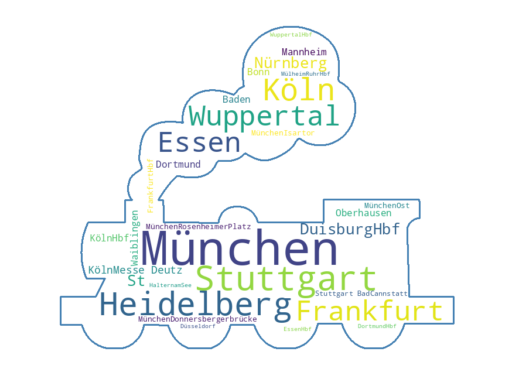

In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = ' '.join(names)

mask = np.array(Image.open("images/trainshape.png"))
wc = WordCloud(background_color="white", max_words=30, mask=mask,
                contour_width=3, contour_color='steelblue')

wordcloud = wc.generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()